<a id = "ref00"></a>

<center><h3> BSc Hons Finance & Investment Management </h3></center>

<a><img src="UUBS.png" width="180" height="180" border="10" /></a>

<hr>

<center>
<h2>FIN303: Financial Modelling</h2>
<h2>Coursework 2: Individual Report (50%)</h2>
<h1><span style="color:blue">Signal-based Trading on SPY[ETF]</h1>
<h2><span style="color:blue">Report Notebook 02</h2>
<h3>11.59pm Friday December 27 2024</h3></span></centre>
<br>
<br>

###  <span style="color:blue">Your Details</span>

In [1]:
# Shift+Enter on this cell to record your name and Student ID

input('Please input your full name and Student ID:') 

Please input your full name and Student ID:Fan Zhiming B00918654


'Fan Zhiming B00918654'

### Strategy Evaluation 
In this notebook you should utilise the predictive power of your multiple linear regresssion model to underpin a signal-based buy-or-sell strategy for SPY stock. You should test the strategy on both training and test set data to ascertain whether or not the signal could generate profit consistently. 

In [2]:
# import any and all packages you need in this cell
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# leave this cell unchanged by be sure to Run it.
import warnings
warnings.filterwarnings("ignore")

### Step 0: Importing the Indexpanel data frame object

In [4]:
# in Report Notebook 01 you should have saved the Indexpanel 
# data frame object to a CSV file for later use. Now read it in.
Indexpanel = pd.read_csv('data/indexdata/Indexpanel.csv').set_index('Date')
Indexpanel.head()


,spy,spy_lag1,sp500,dji,cac40,aord,hsi,Price
Date,,,,,,,,
2011-01-04,-0.750000,0.620003,15.329956,93.470703,60.620117,-9.000000,191.169922,127.330002
2011-01-05,1.110000,-0.750000,-4.169922,17.709961,-3.780029,-25.200196,107.640625,126.580002
2011-01-06,-0.130004,1.110000,7.510010,28.319336,6.870117,7.899903,-74.919922,127.690002
2011-01-07,-0.979996,-0.130004,-1.880005,-20.069336,-18.469971,-12.399902,-57.398438,127.559998
2011-01-10,0.860000,-0.979996,-3.570068,-24.520508,-42.600097,9.200195,-188.210937,126.580002


### Step 1: Splitting the data

In [5]:
# extract training and test data sets from Indexpanel
Train = Indexpanel.iloc[-2000:-1000, :]
Test = Indexpanel.iloc[-1000:, :]


### Step 2: Fitting the model to the training data

In [6]:
# use the training data to build the model
formula = 'spy~spy_lag1+sp500+dji+cac40+aord+hsi'

# replace None with your model code
lm = smf.ols(formula=formula, data=Train).fit()

### Step 3: Making predictions

In [7]:
# make predictions on both training and test data sets
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

### Step 4: Building the strategy (and determining profit)

In [8]:
# set up and apply the strategy to the training data 
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy']*Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made, based on applying strategy to Training data: $',
      round(Train['Profit'].sum(),2))


Total profit made, based on applying strategy to Training data: $ 103.49


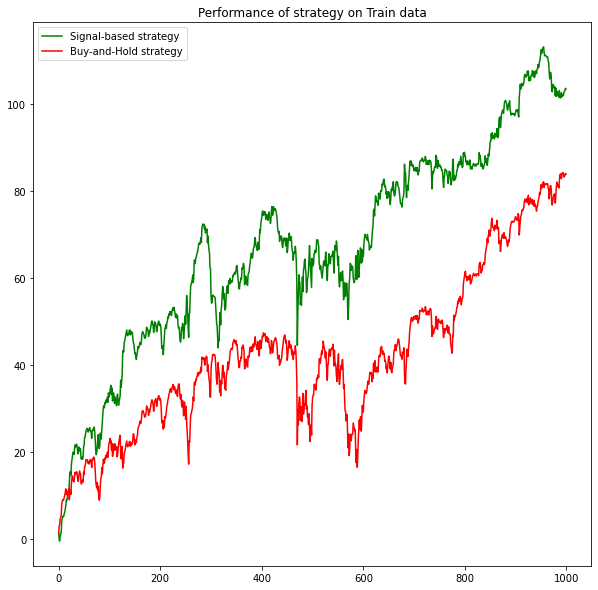

In [9]:
# compare your signal-based strategy with a 
# buy-and-hold strategy for the training data
plt.figure(figsize=(10, 10))
plt.title('Performance of strategy on Train data')
plt.plot(Train['Wealth'].values, color='green', label='Signal-based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy-and-Hold strategy')
plt.legend()
plt.show()

In [10]:
# now apply the strategy to the test data
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy']*Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made, based on applying strategy to Test data: $',
      round(Test['Profit'].sum(),2))



Total profit made, based on applying strategy to Test data: $ 62.59


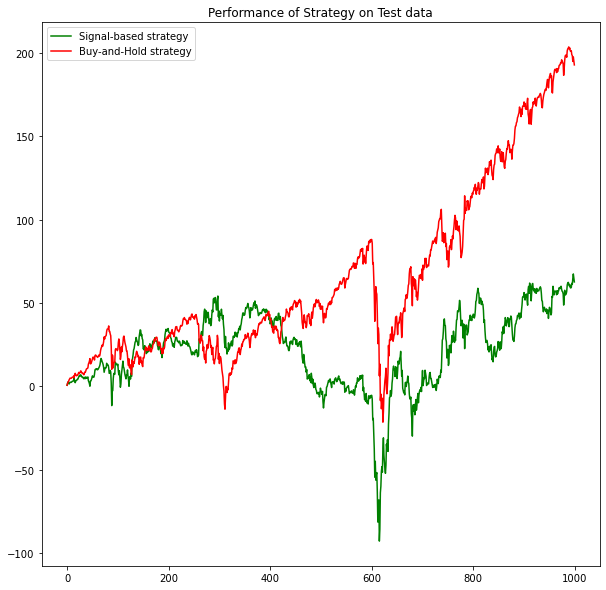

In [11]:
# compare your signal-based strategy with a 
# buy-and-hold strategy for the test data
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy on Test data')
plt.plot(Test['Wealth'].values, color='green', label='Signal-based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy-and-Hold strategy')
plt.legend()
plt.show()




### Step 5: Model evaluation - practical standards

Make use of two common practical standards - **Sharpe ratio** and **maximum drawdown** - to evaluate your model performance


In [12]:
# add on the intial share price to obtain
# the value of your holding at any given time
Train['Wealth'] = Train['Wealth']+Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth']+Test.loc[Test.index[0], 'Price']


In [13]:
# calculate the Sharpe ratio for the training data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
SRtrain = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)
print('Yearly Sharpe Ratio is ', SRtrain)

Daily Sharpe Ratio is  0.06923267698016564
Yearly Sharpe Ratio is  1.0990346753327072


In [14]:
# calculate the Sharpe ratio for the test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
SRtest = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)
print('Yearly Sharpe Ratio is ',SRtest)




Daily Sharpe Ratio is  0.014825882867334645
Yearly Sharpe Ratio is  0.23535359420364416


In [15]:
# calculate maximum drawdown for the training data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
MDtrain = Train['Drawdown'].max()
print('Maximum Drawdown in Train is ', MDtrain)


Maximum Drawdown in Train is  0.13171815854269348


In [16]:
# calculate maximum drawdown for the test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
MDtest = Test['Drawdown'].max()
print('Maximum Drawdown in Test is ', MDtest)


Maximum Drawdown in Test is  0.4838578290589464


In [17]:
# leave this cell unchanged but be sure to Run it.
# It will create a table to display your calculated
# values for Sharpe ration and maximum drawdown for 
# both training and test and data
def assessTable2(srtest,srtrain,mdtest,mdtrain): 
    assessment2 = pd.DataFrame(index=['Sharpe Ratio','Maximum Drawdown'],columns=['Train','Test'])
    assessment2['Train'] = [srtrain,mdtrain]
    assessment2['Test'] = [srtest,mdtest]
    return assessment2

assessTable2(SRtest,SRtrain,MDtest,MDtrain)

,Train,Test
Sharpe Ratio,1.099035,0.235354
Maximum Drawdown,0.131718,0.483858


<div align="right"><a href="#ref00">back to top</a></div>